In [1]:
import numpy as np
import matplotlib.dates as mdates
import matplotlib
import matplotlib.pyplot as plt
import datetime
import os

In [2]:
import glob
mountFileName = "../../Bureau/IRAP_mount/NN_training/CEGAN_lines/"
localFileName = '../NN_training/CEGAN_lines/'
autoencoderTrainingMount = "../../../Desktop/IRAP_mount/IonosphericSignalRecontruction/AE_training_results/"
autoencoderTrainingLocal = "../IonosphericSignalRecontruction/AE_training_results/"

In [46]:
def DisplayGraphWithInfos(array, infos, title, axs, axy, axn, fig):
    x_lims = list()
    x_lims.append(infos[0]+datetime.timedelta(hours=16))
    x_lims.append(x_lims[0]+datetime.timedelta(days=infos[7]))
    x_lims = mdates.date2num(x_lims)
    axs[axy][axn].xaxis_date()
    axs[axy][axn].imshow(array, origin='lower', cmap=plt.get_cmap('jet',20) , aspect='auto',extent=[x_lims[0],x_lims[1],infos[2],infos[1]])
    x_lims = mdates.DateFormatter("%H:%M")
    axs[axy][axn].xaxis.set_major_formatter(x_lims)
    axs[axy][axn].set_title("{} -- {} -- {}/{}/{} -- Quiet:{} -- Accuracy : {}%".format(infos[9], title, infos[0].year, infos[0].month, infos[0].day, infos[8], np.round(100-infos[13], 2)))
    axs[axy][axn].set_xlabel("Time")
    axs[axy][axn].set_ylabel("Latitude")
    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap('jet'), norm=plt.Normalize(vmin=infos[6], vmax=infos[5]))
    sm._A = []
    clb=fig.colorbar(sm, ax=axs[axy][axn])
    clb.set_label("nT")

/home/cristille/.local/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


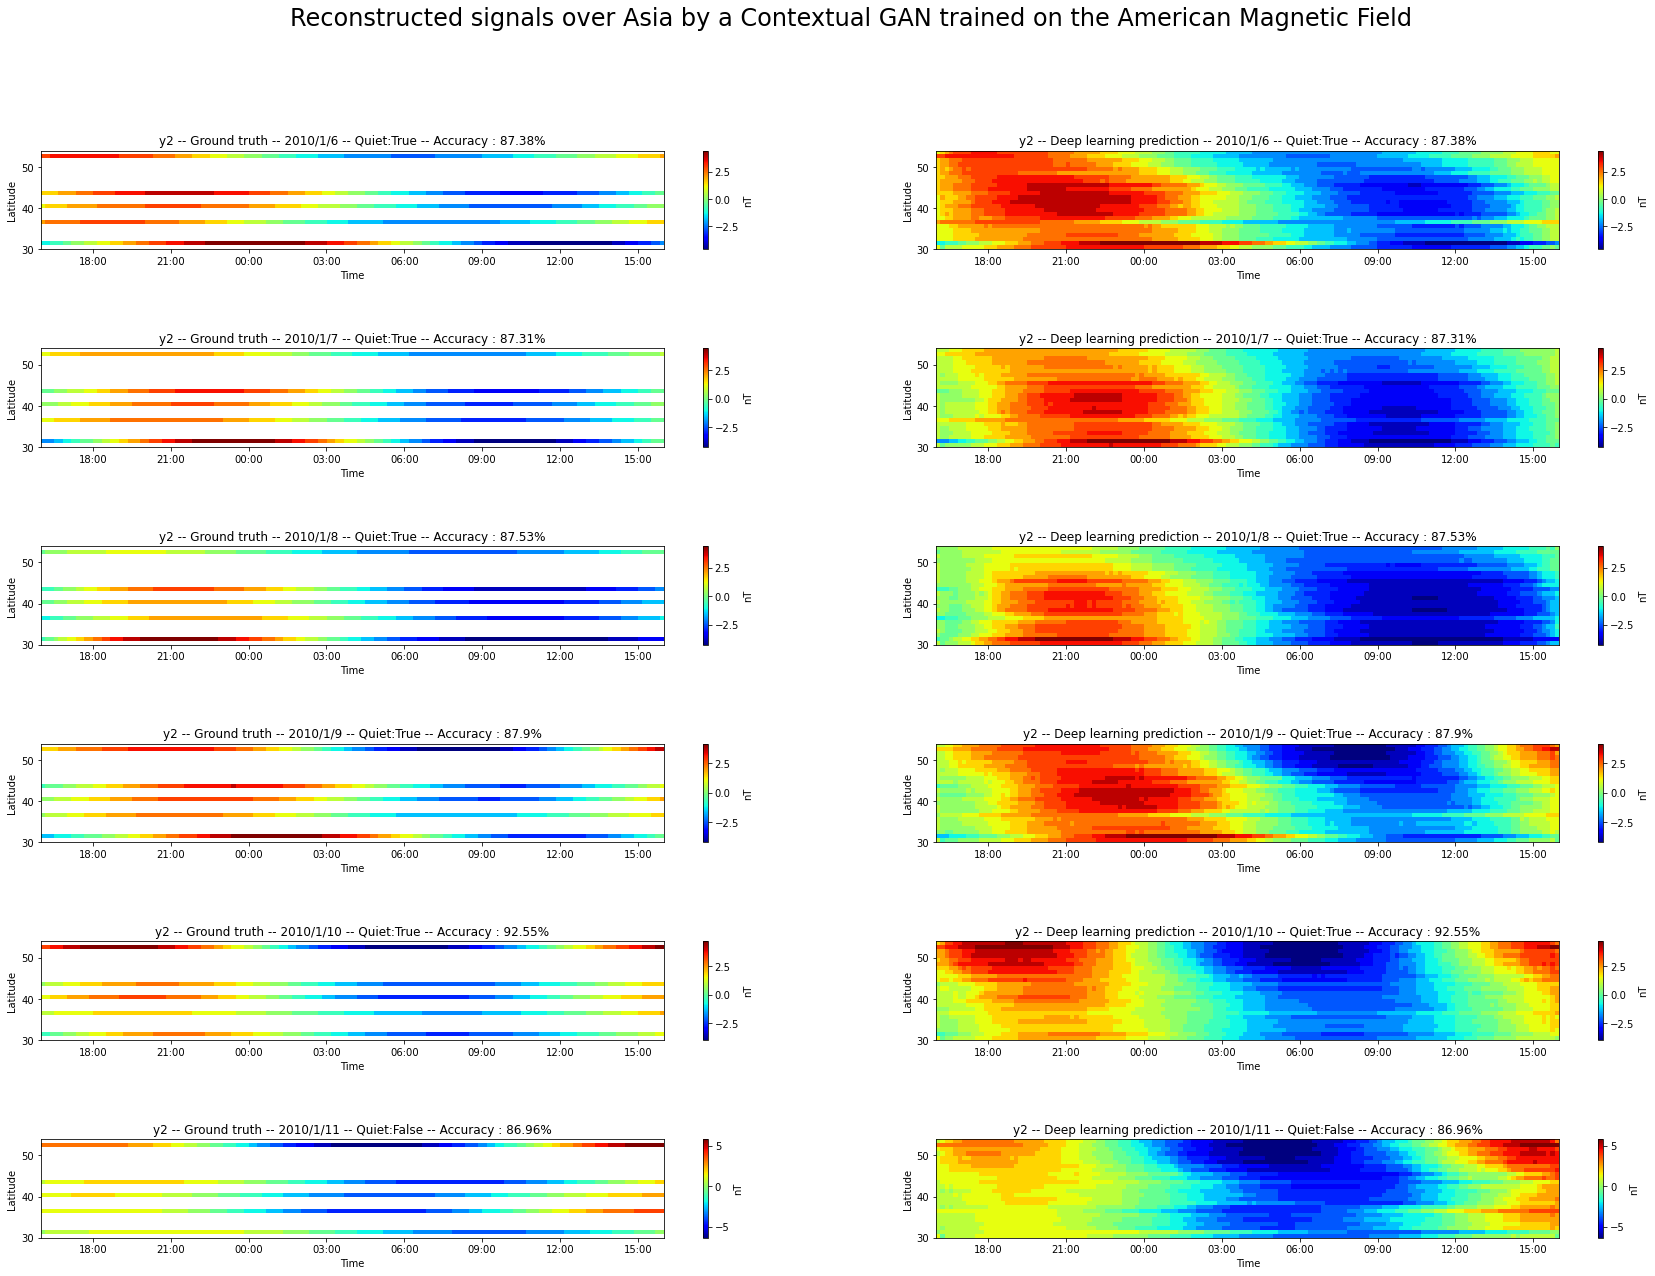

In [51]:
trainingArray = []
epoch = 100

GAN_saveName = "CEGAN_Asia_epoch{}.npy".format(epoch)
trainingArray.append(np.load('{}{}'.format(mountFileName, GAN_saveName), allow_pickle=True, encoding="latin1"), )
trainingArray = np.asarray(trainingArray)
    
numberOfPlots = 6
fig, axs = plt.subplots(numberOfPlots,2, figsize=(30, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 1., wspace=.15)

axs = axs.ravel().reshape(numberOfPlots,2)

fig.suptitle("Reconstructed signals over Asia by a Contextual GAN trained on the American Magnetic Field", fontsize=24)

for y in range(numberOfPlots):
    DisplayGraphWithInfos(trainingArray[0][y][0], trainingArray[0][y][2], "Ground truth", axs, y, 0, fig)
    DisplayGraphWithInfos(trainingArray[0][y][1], trainingArray[0][y][2], "Deep learning prediction", axs, y, 1, fig)


fig.savefig("NeuralNet_predictions")
fig.show()

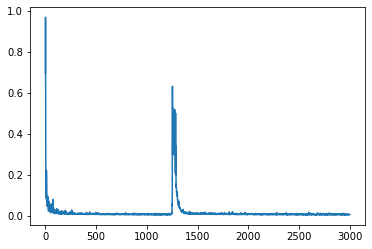

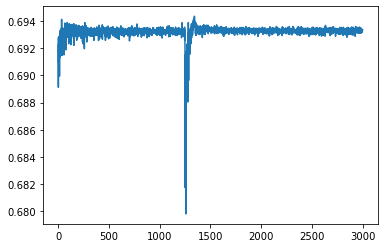

In [5]:
plt.plot(np.load('../../Bureau/IRAP_mount/NN_training/CEGAN_lines/model_save/G_D_losses.npy')[0])
plt.show()
plt.plot(np.load('../../Bureau/IRAP_mount/NN_training/CEGAN_lines/model_save/G_D_losses.npy')[1])
plt.show()